# Übung zu kMeans

In der Vorlesung wurde das Cluster-Verfahren kMeans besprochen. Dieses und zusätzliche Erweiterungen werden wir in dieser Übung implementieren.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Mit folgendem Code erzeugen wir ein Beispielcorpus mit 300 Beispielen und einer Merkmaledimension von zwei. Das Corpus kann in 4 Cluster eingeteilt werden.
Wir verwenden dieses zum Evaluieren unserer k-Means-Implementierung.

(300, 2)


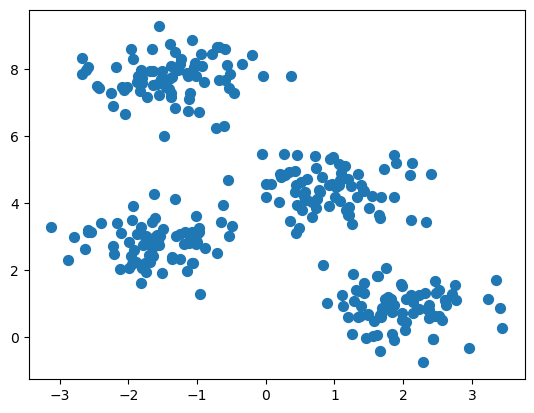

In [4]:
from sklearn.datasets import make_blobs

X_train, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
print(X_train.shape)
plt.scatter(X_train[:, 0], X_train[:, 1], s=50);

## Erklären Sie den Unterschied zwischen k-Means und hierarchischem Clustering

k-Means: definiert initiale Centroide, berechnet Distanz von allen Punkten zu diesen Centroiden und berechnet basierend auf diesen und den zugehörigen data points die neuen Centroide mit jeder Iteration. Kann für beliebige k Ausgaben liefern
Hierarchisch: berechenet zwischen allen data points die Distanzen und clustert naheliegende points um diese hirarchisch zu größeren Clustern zusammenzufassen. Wird als output nie eine für den Datensatz "ungünstige" Clusteranzahl ausgeben

## Implementieren Sie den k-Means Algorithmus

In [5]:
class MyKMeans:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.centroids = None
        
    def fit(self, X):
        random_indeces = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[random_indeces]
        
        while True:  
            false_labels = self.assign_clusters(X)
            new_centroids = self.update_centroids(X, false_labels)
            self.centroids = new_centroids
            if np.allclose(self.centroids, new_centroids): 
                break
                        
    def predict(self, X):
        labels = self.assign_clusters(X)
        return labels
        
    def assign_clusters(self, X):
        distances = self.compute_distances(X)
        false_labels = np.argmin(distances, axis=1)
        return false_labels
        
    def compute_distances(self, X):
        distances = np.zeros((len(X), self.n_clusters))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        return distances
    
    def update_centroids(self, X, false_labels):
        new_centroids = np.zeros_like(self.centroids) 
        for i in range(self.n_clusters):
            points = X[false_labels == i] 
            if len(points > 0):
                new_centroids[i] = np.mean(points, axis=0)
            else:
                new_centroids[i] = self.centroids[i]
        return new_centroids

## Plotten sie die gefunden Cluster mit den zugehörigen Zentroiden

In [6]:
def visualize_clusters(X, labels, centroids):
    colors = ['r', 'g', 'b', 'c']
    plt.figure(figsize=(8, 6))
    
    for i in range(len(centroids)):
        points = X[labels == i]
        plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f"Cluster {i+1}")
        
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', label='Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

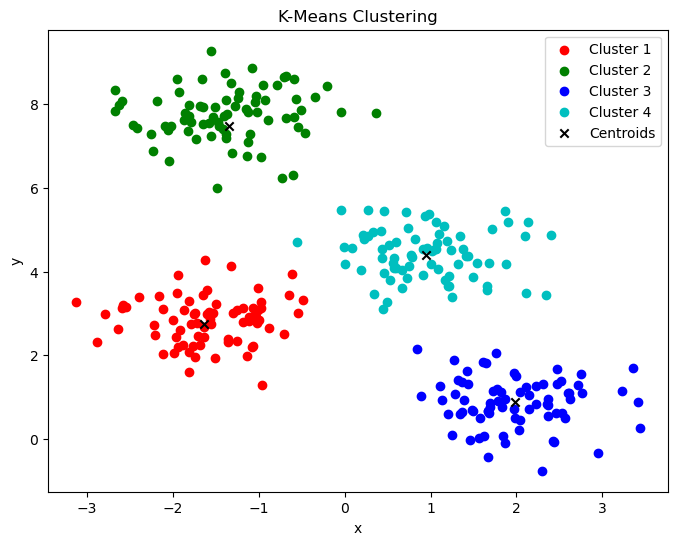

In [35]:
kmeans = MyKMeans(4)
kmeans.fit(X_train)
labels = kmeans.predict(X_train)

visualize_clusters(X_train, labels, kmeans.centroids)

## In der Vorlesung haben wir ein Verfahren besprochen, mit dem das Problem der initialen Centroide gelöst werden kann. Implementieren sie dieses und Testen ihre k-Means-Erweiterung.

In [7]:
import numpy as np

class MyKMeansPlus:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.centroids = None
        
    def fit(self, X):
        self.centroids = self.kmeans_plusplus(X)
        
        while True:  
            false_labels = self.assign_clusters(X)
            new_centroids = self.update_centroids(X, false_labels)
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
                        
    def predict(self, X):
        labels = self.assign_clusters(X)
        return labels
        
    def assign_clusters(self, X):
        distances = self.compute_distances(X, self.centroids)
        false_labels = np.argmin(distances, axis=1) 
        return false_labels
        
    def compute_distances(self, X, centroids):
        distances = np.zeros((len(X), self.n_clusters))
        for i, centroid in enumerate(centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        return distances
    
    def update_centroids(self, X, false_labels):
        new_centroids = np.zeros_like(self.centroids) 
        for i in range(self.n_clusters):
            points = X[false_labels == i] 
            if len(points) > 0:
                new_centroids[i] = np.mean(points, axis=0)
            else:
                new_centroids[i] = self.centroids[i]
        return new_centroids
    
    def kmeans_plusplus(self, X):
        centroids = []
        random_index = np.random.choice(len(X))
        centroids.append(X[random_index])

        for _ in range(1, self.n_clusters):
            distances = self.compute_distances(X, centroids) 
            max_distances = np.max(distances, axis=1) 
            probabilities = max_distances / np.sum(max_distances)
            random_index = np.random.choice(len(X), p=probabilities)
            centroids.append(X[random_index])

        return np.array(centroids)

In [8]:
def visualize_clusters(X, labels, centroids):
    colors = ['r', 'g', 'b', 'c']
    plt.figure(figsize=(8, 6))
    
    for i in range(len(centroids)):
        points = X[labels == i]
        plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f"Cluster {i+1}")
        
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', label='Centroids')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

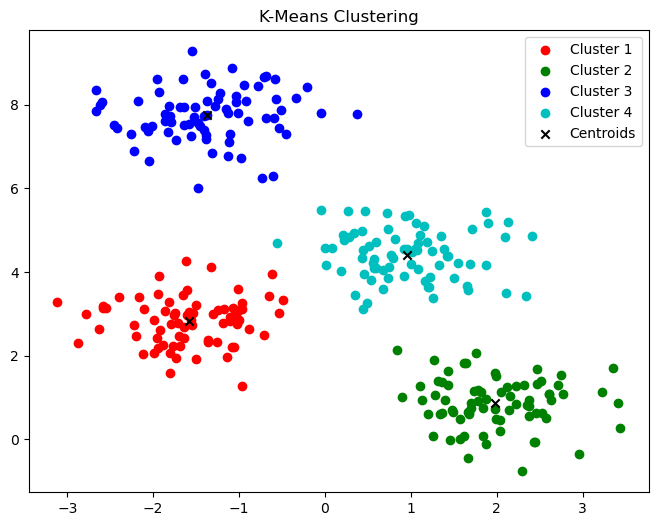

In [9]:
kmeans = MyKMeansPlus(4)
kmeans.fit(X_train)
labels = kmeans.predict(X_train)

visualize_clusters(X_train, labels, kmeans.centroids)

## Testen Sie ihr Verfahren mit einem Datensatz ihrer Wahl und analysieren Sie die Ergebnisse

Digit dataset - plotted centroids und TSNE 2D Cluster-Verteilung

In [36]:
from sklearn.datasets import load_digits

digits_dataset = load_digits()
X_train = digits_dataset['data']

In [63]:
kmeans = MyKMeansPlus(10)
kmeans.fit(X_train)
clusters = kmeans.predict(X_train)

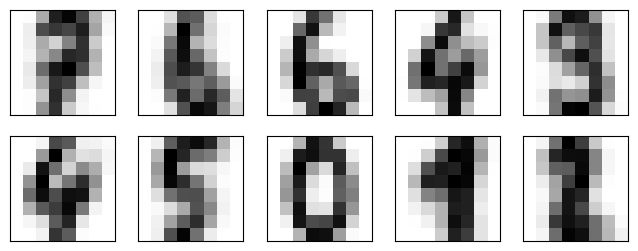

In [64]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))

centers = kmeans.centroids.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [121]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.cm as cm

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)

In [151]:
kmeans = MyKMeansPlus(10)
kmeans.fit(X_scaled)
labels = kmeans.predict(X_scaled)

In [152]:
def visualize_tsne(X, labels):
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    colormap = cm.get_cmap('viridis', len(np.unique(labels)))

    plt.figure(figsize=(8, 8))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap=colormap, alpha=0.5)

    sm = plt.cm.ScalarMappable(cmap=colormap)
    sm.set_array([])
    cbar = plt.colorbar(sm, ticks=[], ax=plt.gca())
    cbar.set_label('Cluster')

    plt.title('t-SNE Visualization of Digit Dataset')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.xticks([])
    plt.yticks([])
    plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_3064\4228365337.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', len(np.unique(labels)))


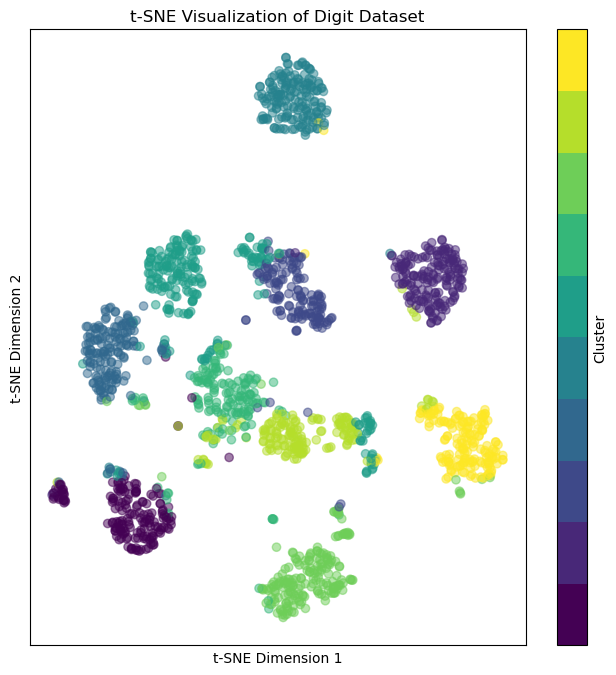

In [153]:
visualize_tsne(X_scaled, labels)